In [ ]:
import tensorflow as tf

In [ ]:
a = tf.constant(5)
print(a)

tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
b = tf.constant(10)
print(b)

tf.Tensor(10, shape=(), dtype=int32)


In [ ]:
c = tf.add(a, b)
print(c)

tf.Tensor(15, shape=(), dtype=int32)


In [ ]:
var1 = tf.Variable(20)
print(var1)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=20>


In [ ]:
var2 = tf.Variable([[1, 2], [3, 4]])
var3 = tf.Variable([[5, 6], [7, 8]])
print(tf.matmul(var2, var3))

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [ ]:
#MNIST Digit Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


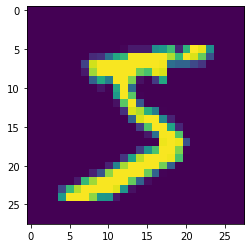

5


In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)/255.0
x_test = x_test.reshape(x_test.shape[0], -1)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [ ]:
#Using Sequential API to build and train model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape = (784, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size = 1024)

Epoch 1/10
59/59 [==============================] - 3s 42ms/step - loss: 0.5970 - accuracy: 0.8425
Epoch 2/10
59/59 [==============================] - 2s 41ms/step - loss: 0.2047 - accuracy: 0.9413
Epoch 3/10
59/59 [==============================] - 2s 41ms/step - loss: 0.1428 - accuracy: 0.9588
Epoch 4/10
59/59 [==============================] - 3s 43ms/step - loss: 0.1098 - accuracy: 0.9683
Epoch 5/10
59/59 [==============================] - 3s 44ms/step - loss: 0.0868 - accuracy: 0.9747
Epoch 6/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0701 - accuracy: 0.9800
Epoch 7/10
59/59 [==============================] - 3s 44ms/step - loss: 0.0616 - accuracy: 0.9811
Epoch 8/10
59/59 [==============================] - 2s 42ms/step - loss: 0.0504 - accuracy: 0.9857
Epoch 9/10
59/59 [==============================] - 2s 42ms/step - loss: 0.0416 - accuracy: 0.9882
Epoch 10/10
59/59 [==============================] - 2s 41ms/step - loss: 0.0357 - accuracy: 0.9895


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9796


[0.06704097241163254, 0.9796000123023987]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Building and training model using functional API 
from tensorflow.keras import Model 
from tensorflow.keras.layers import Concatenate, Input

In [39]:
input = Input(shape= [784,])
hidden_1 = Dense(256, activation = 'relu')(input)
hidden_2 = Dense(256, activation='relu')(hidden_1)
hidden_3 = Dense(256, activation='relu')(input)
concat = Concatenate()([hidden_2, hidden_3])
output = Dense(10, activation='softmax')(concat)
model = Model(inputs = [input], outputs = [output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 256)          200960      ['input_3[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 256)          65792       ['dense_11[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 256)          200960      ['input_3[0][0]']                
                                                                                            

In [40]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train, epochs=10, batch_size = 1024)

Epoch 1/10
59/59 [==============================] - 5s 66ms/step - loss: 0.5197 - accuracy: 0.8628
Epoch 2/10
59/59 [==============================] - 4s 70ms/step - loss: 0.1872 - accuracy: 0.9468
Epoch 3/10
59/59 [==============================] - 4s 68ms/step - loss: 0.1315 - accuracy: 0.9617
Epoch 4/10
59/59 [==============================] - 4s 68ms/step - loss: 0.0976 - accuracy: 0.9731
Epoch 5/10
59/59 [==============================] - 4s 69ms/step - loss: 0.0757 - accuracy: 0.9786
Epoch 6/10
59/59 [==============================] - 5s 78ms/step - loss: 0.0610 - accuracy: 0.9823
Epoch 7/10
59/59 [==============================] - 4s 69ms/step - loss: 0.0500 - accuracy: 0.9861
Epoch 8/10
59/59 [==============================] - 4s 70ms/step - loss: 0.0405 - accuracy: 0.9887
Epoch 9/10
59/59 [==============================] - 4s 69ms/step - loss: 0.0335 - accuracy: 0.9911
Epoch 10/10
59/59 [==============================] - 4s 72ms/step - loss: 0.0281 - accuracy: 0.9925


In [42]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0703 - accuracy: 0.9781


[0.07030081003904343, 0.9781000018119812]